<a href="https://colab.research.google.com/github/fatmaT2001/DataAnalysis_MachineLearning_Project/blob/main/DataAnalysis_MachineLearning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import itertools

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


%matplotlib inline

# Data preprocessing

In [ ]:
#Jain
JainText=np.loadtxt("Jain.txt", skiprows=7)
JainDataset=pd.DataFrame(JainText,columns=["Feature1","Feature2","Label"])

#Aggregation
AggregationText=np.loadtxt("Aggregation.txt", skiprows=7)
AggregationDataset=pd.DataFrame(AggregationText,columns=["Feature1","Feature2","Label"])


#Compound
CompoundText=np.loadtxt("Compound.txt", skiprows=7)
CompoundnDataset=pd.DataFrame(CompoundText,columns=["Feature1","Feature2","Label"])

#Flame
FlameText=np.loadtxt("Flame.txt", skiprows=7)
FlameDataset=pd.DataFrame(FlameText,columns=["Feature1","Feature2","Label"])

#Pathbased
PathbasedText=np.loadtxt("Pathbased.txt", skiprows=7)
PathbasedDataset=pd.DataFrame(PathbasedText,columns=["Feature1","Feature2","Label"])

#Spiral
SpiralText=np.loadtxt("Spiral.txt", skiprows=7)
SpiralDataset=pd.DataFrame(SpiralText,columns=["Feature1","Feature2","Label"])


## Data Cleaning

Handling Missing Data

In [ ]:
JainDataset.dropna(inplace=True)
AggregationDataset.dropna(inplace=True)
CompoundnDataset.dropna(inplace=True)
FlameDataset.dropna(inplace=True)
PathbasedDataset.dropna(inplace=True)
SpiralDataset.dropna(inplace=True)

Removing Duplicates

In [ ]:
JainDataset.drop_duplicates(inplace=True)
AggregationDataset.drop_duplicates(inplace=True)
CompoundnDataset.drop_duplicates(inplace=True)
FlameDataset.drop_duplicates(inplace=True)
PathbasedDataset.drop_duplicates(inplace=True)
SpiralDataset.drop_duplicates(inplace=True)


Checking The Balance Of The data

In [ ]:
class_distribution = JainDataset['Label'].value_counts()
class_distribution

1.0    276
2.0     97
Name: Label, dtype: int64

## Spliting The Data

In [ ]:
Jain_data=JainDataset.drop('Label', axis=1)
Jain_label=JainDataset['Label'].astype(np.int_)


# For AggregationDataset
Aggregation_data = AggregationDataset.drop('Label', axis=1)
Aggregation_label = AggregationDataset['Label'].astype(np.int_)

# For CompoundnDataset
Compound_data = CompoundnDataset.drop('Label', axis=1)
Compound_label = CompoundnDataset['Label'].astype(np.int_)

# For FlameDataset
Flame_data = FlameDataset.drop('Label', axis=1)
Flame_label = FlameDataset['Label'].astype(np.int_)

# For PathbasedDataset
Pathbased_data = PathbasedDataset.drop('Label', axis=1)
Pathbased_label = PathbasedDataset['Label'].astype(np.int_)

# For SpiralDataset
Spiral_data = SpiralDataset.drop('Label', axis=1)
Spiral_label = SpiralDataset['Label'].astype(np.int_)


In [ ]:
Jain_train_data, Jain_test_data, Jain_train_labels, Jain_test_labels = train_test_split(Jain_data, Jain_label,  test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 0)



#'Aggregation_data'
Aggregation_train_data, Aggregation_test_data, Aggregation_train_labels, Aggregation_test_labels = train_test_split(
    Aggregation_data, Aggregation_label, test_size=0.2, shuffle=True, random_state=0)

# Compound_data'
Compound_train_data, Compound_test_data, Compound_train_labels, Compound_test_labels = train_test_split(
    Compound_data, Compound_label, test_size=0.2, shuffle=True, random_state=0)

# Flame_data
Flame_train_data, Flame_test_data, Flame_train_labels, Flame_test_labels = train_test_split(
    Flame_data, Flame_label, test_size=0.2, shuffle=True, random_state=0)

# Pathbased_data
Pathbased_train_data, Pathbased_test_data, Pathbased_train_labels, Pathbased_test_labels = train_test_split(
    Pathbased_data, Pathbased_label, test_size=0.2, shuffle=True, random_state=0)

# Spiral_data
Spiral_train_data, Spiral_test_data, Spiral_train_labels, Spiral_test_labels = train_test_split(
    Spiral_data, Spiral_label, test_size=0.2, shuffle=True, random_state=0)



## Data Normalization

In [ ]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Scaled training data for Jain dataset
scaled_Jain_train_data = pd.DataFrame(scaler.fit_transform(Jain_train_data))
scaled_Jain_test_data = scaler.transform(Jain_test_data)

# Scaled training data for Aggregation dataset
scaled_Aggregation_train_data = pd.DataFrame(scaler.fit_transform(Aggregation_train_data))
scaled_Aggregation_test_data = scaler.transform(Aggregation_test_data)

# Scaled training data for Compound dataset
scaled_Compound_train_data = pd.DataFrame((scaler.fit_transform(Compound_train_data)))
scaled_Compound_test_data = scaler.transform(Compound_test_data)

# Scaled training data for Flame dataset
scaled_Flame_train_data = pd.DataFrame(scaler.fit_transform(Flame_train_data))
scaled_Flame_test_data = scaler.transform(Flame_test_data)

# Scaled training data for Pathbased dataset
scaled_Pathbased_train_data = pd.DataFrame(scaler.fit_transform(Pathbased_train_data))
scaled_Pathbased_test_data = scaler.transform(Pathbased_test_data)

# Scaled training data for Spiral dataset
scaled_Spiral_train_data = pd.DataFrame(scaler.fit_transform(Spiral_train_data))
scaled_Spiral_test_data = scaler.transform(Spiral_test_data)


# Applying SVM


Applying SVM Without regularization

This function Trains an SVM classifier with the aim of minimazing the regularization on the provided training data using GridSearchCV to find
the best model parameters based on accuracy (it means that GridSearchCV will use accuracy as the metric for choosing the best parameter set). The function searches over a predefined set of kernel types ('linear', 'poly', 'rbf', 'sigmoid') and an extremely high C value to minimize the effect of regularization.

The best model is determined through 5-fold cross-validation and is then used to plot the decision regions for the training data.

Parameters:
- train_data : The training data as a NumPy array or a pandas DataFrame. Each row corresponds to a sample and each column to a feature.
- train_labels : The true labels for the training data. It should be a 1D NumPy array or a pandas Series

Returns:
- model_svm: The GridSearchCV instance after fitting it to the training data. This object contains the best model



In [ ]:
def Applying_SVM_Without_regularization(train_data,train_labels):


  varias_parameters = {
      "kernel":['linear', 'poly', 'rbf',"sigmoid"],
      "C": [1e6]  # Extremely high C value to minimize regularization

  }
  svm_object= SVC()
  model_svm = GridSearchCV(svm_object, varias_parameters,cv=3,n_jobs=-1,scoring='accuracy')


  model_svm.fit(train_data,train_labels)

  # Get the best model
  best_svm_model = model_svm.best_estimator_

   # Plot decision regions using the best model as GridSearchCV find the best parameters and avoid fitting each model multiples of times
  fig = plot_decision_regions(X=train_data.values, y=train_labels.values, clf=best_svm_model, legend=2, markers='x^sv<>')
  plt.title(f"Best SVM Model with Kernel: {best_svm_model.kernel} and Extremely High C Value")
  plt.show()

  return model_svm





Applying SVM Without regularization

This function Trains an SVM classifier with wide range of regularization values on the provided training data using GridSearchCV to find the best model parameters based on accuracy (it means that GridSearchCV will use accuracy as the metric for choosing the best parameter set). The function searches over a predefined set of kernel types ('linear', 'poly', 'rbf', 'sigmoid') and an extremely high C value to minimize the effect of regularization.


Parameters:
- train_data : The training data as a NumPy array or a pandas DataFrame. Each row corresponds to a sample and each column to a feature.
- train_labels : The true labels for the training data. It should be a 1D NumPy array or a pandas Series

Returns:
- model_svm: The GridSearchCV instance after fitting it to the training data. This object contains the best model

In [ ]:
def Applying_SVM_With_regularization(train_data,train_labels):

  varias_parameters = {
      "kernel":['linear', 'poly', 'rbf',"sigmoid"],
      "C":  np.logspace(-3, 3, 7)

  }
  svm_object= SVC()
  model_svm = GridSearchCV(svm_object, varias_parameters,cv=3,n_jobs=-1,scoring='accuracy')


  model_svm.fit(train_data,train_labels)

  # Get the best model
  best_svm_model = model_svm.best_estimator_

   # Plot decision regions using the best model as GridSearchCV find the best parameters and avoid fitting each model multiples of times
  fig = plot_decision_regions(X=train_data.values, y=train_labels.values, clf=best_svm_model, legend=2, markers='x^sv<>')
  plt.title(f"Best SVM Model with {best_svm_model.kernel.capitalize()} Kernel and C = {best_svm_model.C}")
  plt.show()

  return model_svm




The function prints the best parameters of the model, the accuracy percentage, mean squared error (MSE),
and root mean squared error (RMSE) of the model's predictions on the test data.

Parameters:
- test_data : The feature dataset for testing the model. Shape should be (n_samples, n_features).
- test_label : The true label dataset corresponding to the test_data. Shape should be (n_samples,).
- best_svm_model (estimator): The trained SVM model obtained from GridSearchCV.




In [ ]:
def Module_Evalwation(test_data,test_label,best_svm_model):


  print(f" using this module paramater {best_svm_model.best_params_}")

  # Make predictions on test set
  predictions = best_svm_model.predict(test_data)

  # Calculate accuracy on test set
  test_accuracy = accuracy_score(test_label, predictions)

  # Convert to percentages if desired
  test_accuracy_percentage = test_accuracy * 100

  print(f' We Got the  Accuracy: {test_accuracy_percentage:.2f}%')

  # Calculate Mean Squared Error
  mse = mean_squared_error(test_label, predictions)

  #Root Mean Squared Error (RMSE)
  rmse = mse ** 0.5

  print(f'Mean Squared Error: {mse}')
  print(f'Root Mean Squared Error: {rmse}')



# DataSets

## Jain Dataset


Difference kernals without requrations

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


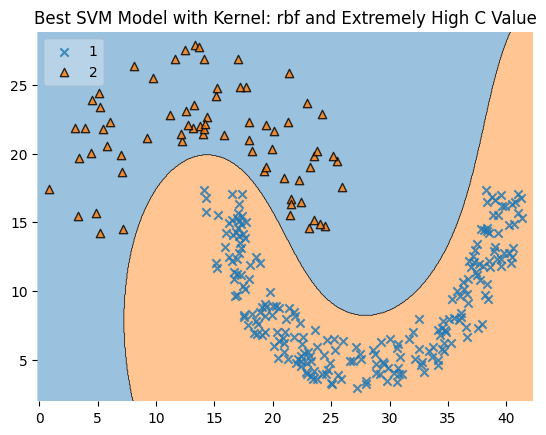

In [ ]:
best_module=Applying_SVM_Without_regularization(Jain_train_data,Jain_train_labels)


Difference kernals With requrations

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


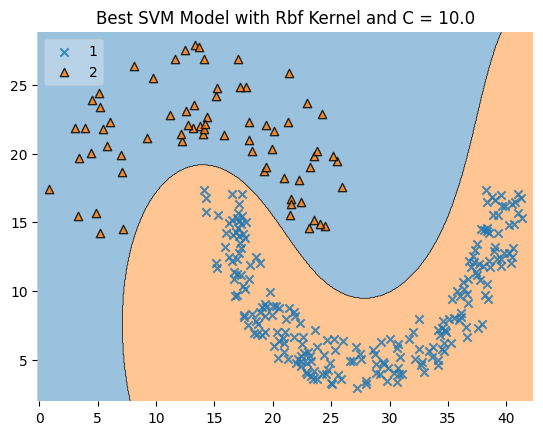

In [ ]:
best_module_with_regularization=Applying_SVM_With_regularization(Jain_train_data,Jain_train_labels)



Evalwating The Module

In [ ]:
print(' without the reqularization ')
Module_Evalwation(Jain_test_data,Jain_test_labels,best_module)
print(' ===========================================================')
print(' with the reqularization ')
Module_Evalwation(Jain_test_data,Jain_test_labels,best_module_with_regularization)


 without the reqularization 
 using this module paramater {'C': 1000000.0, 'kernel': 'rbf'}
 We Got the  Accuracy: 100.00%
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
 with the reqularization 
 using this module paramater {'C': 10.0, 'kernel': 'rbf'}
 We Got the  Accuracy: 100.00%
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


## Aggregation

Difference kernals without requrations


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


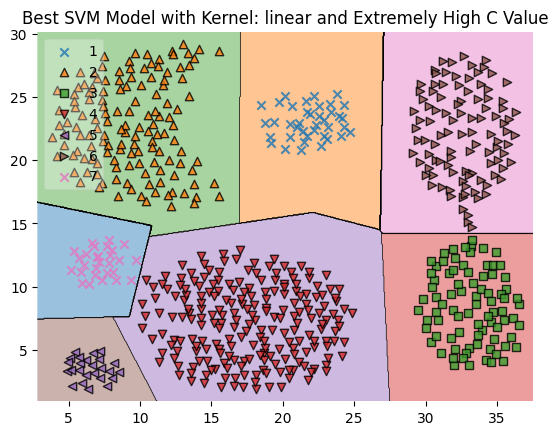

In [ ]:
best_module=Applying_SVM_Without_regularization(Aggregation_train_data,Aggregation_train_labels)


Difference kernals With requrations

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


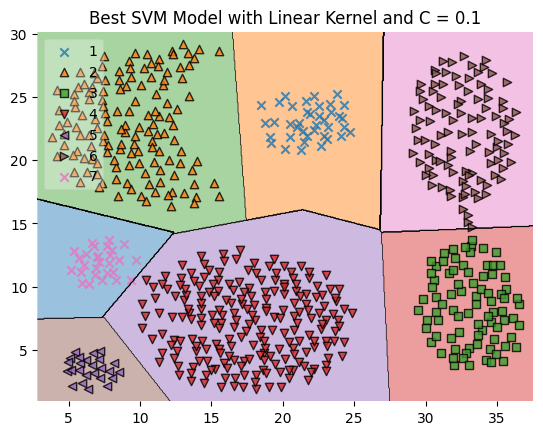

In [ ]:
best_module_with_regularization=Applying_SVM_With_regularization(Aggregation_train_data,Aggregation_train_labels)



In [ ]:
print(' without the reqularization ')

Module_Evalwation(Aggregation_test_data,Aggregation_test_labels,best_module)
print(' ===========================================================')

print(' with the reqularization ')
Module_Evalwation(Aggregation_test_data,Aggregation_test_labels,best_module_with_regularization
)

 without the reqularization 
 using this module paramater {'C': 1000000.0, 'kernel': 'linear'}
 We Got the  Accuracy: 100.00%
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
 with the reqularization 
 using this module paramater {'C': 0.1, 'kernel': 'linear'}
 We Got the  Accuracy: 100.00%
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


##Compound

Difference kernals without requrations

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


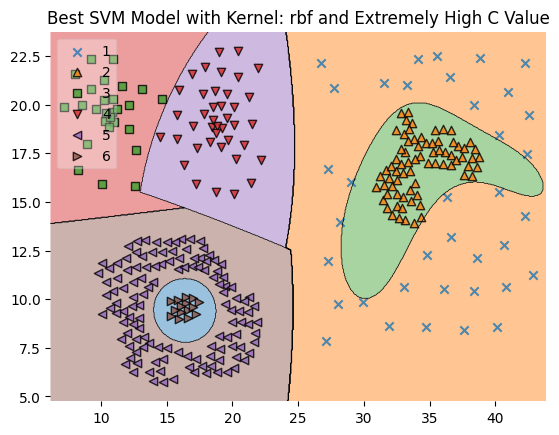

In [ ]:
best_module=Applying_SVM_Without_regularization(Compound_train_data,Compound_train_labels)


Difference kernals with requrations

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


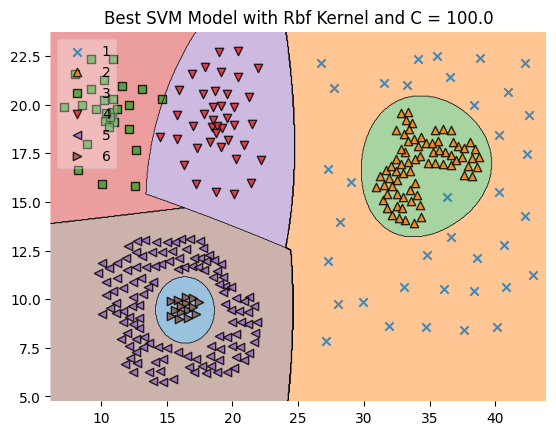

In [ ]:
best_module_with_regularization=Applying_SVM_With_regularization(Compound_train_data,Compound_train_labels)


In [ ]:
print('model without the reqularization ')
Module_Evalwation(Compound_test_data,Compound_test_labels,best_module)
print('============================================')
print('model with the reqularization ')


Module_Evalwation(Compound_test_data,Compound_test_labels,best_module_with_regularization
)

model without the reqularization 
 using this module paramater {'C': 1000000.0, 'kernel': 'rbf'}
 We Got the  Accuracy: 95.00%
Mean Squared Error: 0.05
Root Mean Squared Error: 0.22360679774997896
model with the reqularization 
 using this module paramater {'C': 100.0, 'kernel': 'rbf'}
 We Got the  Accuracy: 96.25%
Mean Squared Error: 0.0375
Root Mean Squared Error: 0.19364916731037085


##Flame

Difference kernals without requrations

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


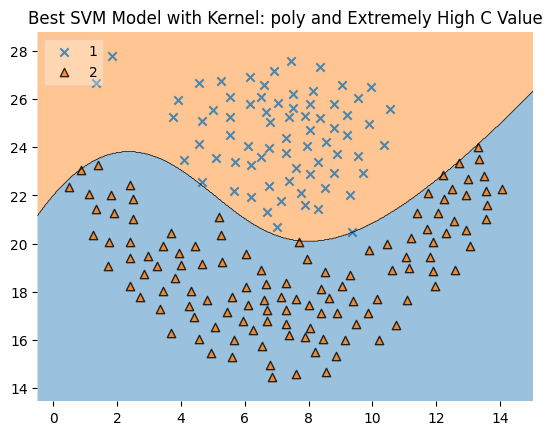

In [ ]:
best_module=Applying_SVM_Without_regularization(Flame_train_data,Flame_train_labels)


Difference kernals with requrations

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


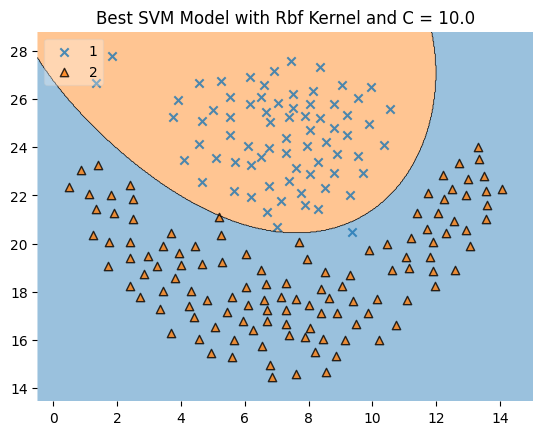

In [ ]:
best_module_using_reqularization=Applying_SVM_With_regularization(Flame_train_data,Flame_train_labels)


In [ ]:
print('model without the reqularization ')
Module_Evalwation(Flame_test_data,Flame_test_labels,best_module)
print('============================================')
print('model with the reqularization ')

Module_Evalwation(Flame_test_data,Flame_test_labels,best_module_using_reqularization
)

model without the reqularization 
 using this module paramater {'C': 1000000.0, 'kernel': 'poly'}
 We Got the  Accuracy: 97.92%
Mean Squared Error: 0.020833333333333332
Root Mean Squared Error: 0.14433756729740643
model with the reqularization 
 using this module paramater {'C': 10.0, 'kernel': 'rbf'}
 We Got the  Accuracy: 97.92%
Mean Squared Error: 0.020833333333333332
Root Mean Squared Error: 0.14433756729740643


##Pathbased

Difference kernals without requrations

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


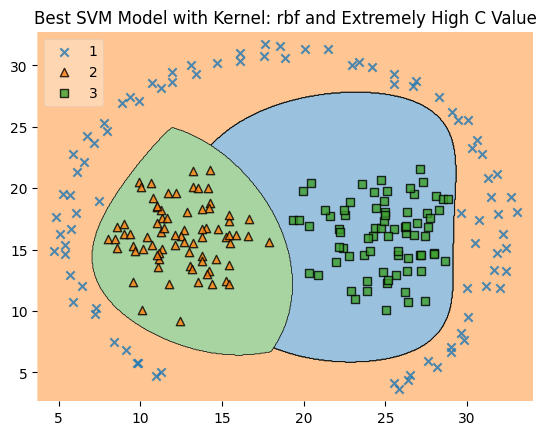

In [ ]:
best_module=Applying_SVM_Without_regularization(Pathbased_train_data,Pathbased_train_labels)


Difference kernals without requrations

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


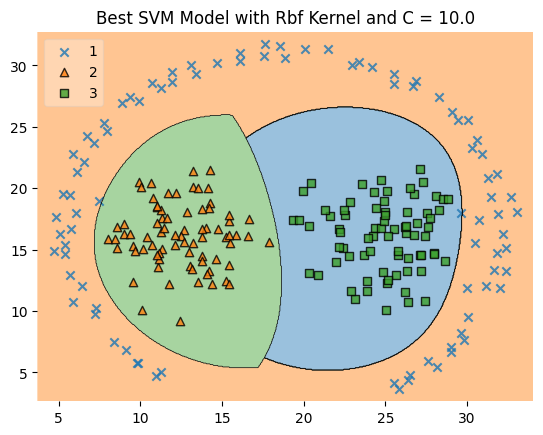

In [ ]:
best_module_with_regularization=Applying_SVM_With_regularization(Pathbased_train_data,Pathbased_train_labels)


In [ ]:
print('model without the reqularization ')
Module_Evalwation(Pathbased_test_data,Pathbased_test_labels,best_module)
print('============================================')
print('model with the reqularization ')


Module_Evalwation(Pathbased_test_data,Pathbased_test_labels,best_module_with_regularization
)

model without the reqularization 
 using this module paramater {'C': 1000000.0, 'kernel': 'rbf'}
 We Got the  Accuracy: 95.00%
Mean Squared Error: 0.15
Root Mean Squared Error: 0.3872983346207417
model with the reqularization 
 using this module paramater {'C': 10.0, 'kernel': 'rbf'}
 We Got the  Accuracy: 96.67%
Mean Squared Error: 0.13333333333333333
Root Mean Squared Error: 0.3651483716701107


##Spiral

Difference kernals without requrations

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


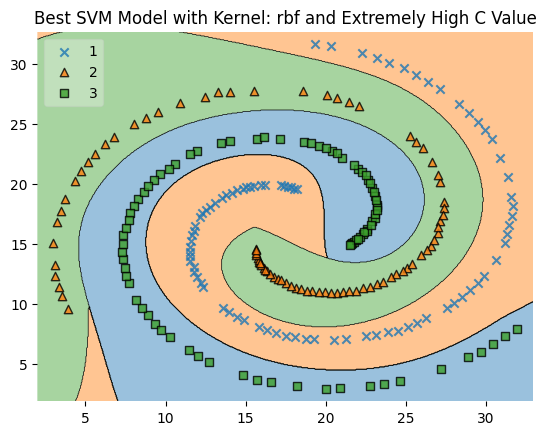

In [ ]:
best_module=Applying_SVM_Without_regularization(Spiral_train_data,Spiral_train_labels)


Difference kernals without requrations

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


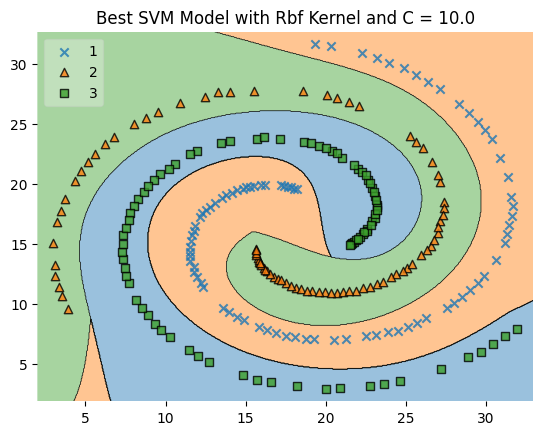

In [ ]:
best_module_with_regularization=Applying_SVM_With_regularization(Spiral_train_data,Spiral_train_labels)


In [ ]:
print('model without the reqularization ')
Module_Evalwation(Spiral_test_data,Spiral_test_labels,best_module)
print('============================================')
print('model with the reqularization ')


Module_Evalwation(Spiral_test_data,Spiral_test_labels,best_module_with_regularization
)

model without the reqularization 
 using this module paramater {'C': 1000000.0, 'kernel': 'rbf'}
 We Got the  Accuracy: 100.00%
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
model with the reqularization 
 using this module paramater {'C': 10.0, 'kernel': 'rbf'}
 We Got the  Accuracy: 100.00%
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
